# Step 1: The Hypotheses

## Hypothesis 1: GDP Per Capita vs Suicide

There's this endless debate between people who are advocates of the "money brings happiness" philosophy and their opponents, the "money's just a number" proponents. Let's put these two statements to the test. If it is true that money brings happiness, then as GDP per capita goes up, the number of suicides will go down. We can randomly sample the population and see what the trend is in our sample.

In order to do this, we need to divide our population into two sectors: the high GDP per capita sector and the low GDP per capita sector. From these two we can proceed to randomly sample to get a so-called "treatment" group and a "control" group. The "treatment" group will be those who are in the "high GDP per capita" sector and the "control" group will be those in the "low GDP per capita" sector. 

The above is my reasoning thus far. So, let me lay out my alternate and null hypotheses as follows:

Alternate Hypothesis: Citizens from higher gdp per capita group are more prone to suicide than those in the lower gdp per capita group on average. $\hat{p}_{h,avg}$ - $\hat{p}_{l,avg}$ > 0  (exciting, new claim!)

Null Hypothesis: The suicide rates between the two groups is the same on average. $\hat{p}_{h,avg}$ - $\hat{p}_{l,avg}$ = 0 (no difference bro!)

## Hypothesis 2: Sex vs Suicide 

I am curious to know - are men or women more likely to commit suicide? It would be interesting indeed if we found that say men committed suicide on average more than women. If so, I wonder what the cause of that would be?

I will construct the following hypotheses to test this:

Alternate Hypothesis: The suicide rates between men and women are different (whoa! exciting!).

Null Hypothesis: The suicide rates between men and women is the same (no difference bro!).

## Hypothesis 3: Generation vs Suicide 

Did past generations have more suicides compared to current generations? I've been hearing that suicide rates have been going up. If this is true then the past generations would have lower suicide rates than current generations. So, based on this premise, I'm going to construct my hypotheses like this:

Alternate Hypothesis: The suicide rates among current generations (Gen X, Millenials, Gen Z) is more than suicide rates in previous generations (Silent, G.I., Boomers) (whoa! Cool!).

Null Hypothesis: The suicide rates among current generations is the same as suicide rates in previous generations (no difference bro!).

## Hypothesis 4: Age vs Suicide 

Does age affect suicide? Do younger people commit suicide more than older folks? Or is it the other way around? 

The data is already divided by age group, so we can put forth the below hypotheses:

Alternate Hypothesis: The suicide rates among the various age groups are different (new! exciting!).

Null Hypothesis: The suicide rates among the various age groups is the same (no difference bro!).

## Hypothesis 5: Time vs Suicide 

As we go through time, is suicide increasing? Or is it decreasing? I've heard that suicide rates have been increasing. Let's put this to the test.

Alternate Hypothesis: The suicide rates in past years (1985 - 2000) is greater than the suicide rates in recent years (2001 - 2016)

Null Hypothesis: The suicide rates in past years (1985 - 2000) is the same as the suicide rates in recent years (2001 - 2016)

# Step 2: Retrieving the Data 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [2]:
#Read from the master.csv file and put into a dataframe
suicides = pd.read_csv('master.csv',sep=',',header=0,names=['country','yr','sex','age','suicides_no',
                                                            'population','suicides_100k','country_yr',
                                                            'HDI_yr','gdp_yr','gdp_pc','gen'])

In [3]:
#Check the first 5 entries in dataframe
suicides.head(25)

,country,yr,sex,age,suicides_no,population,suicides_100k,country_yr,HDI_yr,gdp_yr,gdp_pc,gen
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country          27820 non-null object
yr               27820 non-null int64
sex              27820 non-null object
age              27820 non-null object
suicides_no      27820 non-null int64
population       27820 non-null int64
suicides_100k    27820 non-null float64
country_yr       27820 non-null object
HDI_yr           8364 non-null float64
gdp_yr           27820 non-null object
gdp_pc           27820 non-null int64
gen              27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicides.shape

(27820, 12)

# Step 3: Testing the Hypotheses 

## Hypothesis 1: GDP Per Capita versus Suicide 

### Step 1a: Determining the High GDP (treatment) and Low GDP (control) groups

Method 1: Take the max GDP per capita, take the min GDP per capita and compute (max - min) / 2. This will give us a "naive" boundary between the two groups for now. 

In [6]:
suicides.gdp_pc

0         796
1         796
2         796
3         796
4         796
5         796
6         796
7         796
8         796
9         796
10        796
11        796
12        769
13        769
14        769
15        769
16        769
17        769
18        769
19        769
20        769
21        769
22        769
23        769
24        833
25        833
26        833
27        833
28        833
29        833
         ... 
27790    1964
27791    1964
27792    1964
27793    1964
27794    1964
27795    1964
27796    2150
27797    2150
27798    2150
27799    2150
27800    2150
27801    2150
27802    2150
27803    2150
27804    2150
27805    2150
27806    2150
27807    2150
27808    2309
27809    2309
27810    2309
27811    2309
27812    2309
27813    2309
27814    2309
27815    2309
27816    2309
27817    2309
27818    2309
27819    2309
Name: gdp_pc, Length: 27820, dtype: int64

In [7]:
#Let's do a groupby on gdp per capita and see how many total suicides there are
gdp_pc_grouped = suicides.groupby('gdp_pc')[['suicides_100k']].sum()

In [8]:
gdp_pc_grouped.head()

,suicides_100k
gdp_pc,
251,18.00
291,191.44
313,182.63
345,193.30
357,51.05


In [9]:
gdp_pc_grouped = gdp_pc_grouped.reset_index()

In [10]:
gdp_pc_grouped.head()

,gdp_pc,suicides_100k
0,251,18.00
1,291,191.44
2,313,182.63
3,345,193.30
4,357,51.05


In [11]:
#Let's define a naive boundary to decide whether we are in a "high gdp" or "low gdp"
dboundary = (gdp_pc_grouped.gdp_pc.max() - gdp_pc_grouped.gdp_pc.min()) / 2

In [12]:
dboundary

63050.5

In [13]:
#We engineer a new binary column called "gdp_pc_hilo" which shows 1 = high gdp, 0 = low gdp
#suicides['gdp_pc_hilo'] = suicides['gdp_pc'].apply(lambda x : 0 if x < dboundary else 1)
gdp_pc_grouped['gdp_pc_hilo'] = gdp_pc_grouped.gdp_pc.apply(lambda x : 0 if x < dboundary else 1)

In [14]:
#Get the high group (treatment) into a separate dataframe
high_group = gdp_pc_grouped[gdp_pc_grouped['gdp_pc_hilo'] == 1]
high_group.head()

,gdp_pc,suicides_100k,gdp_pc_hilo
2169,63380,141.77,1
2170,64133,158.20,1
2171,64708,138.07,1
2172,64762,87.30,1
2173,64831,134.55,1


In [15]:
#Get the low group (treatment) into a separate dataframe
low_group = gdp_pc_grouped[gdp_pc_grouped['gdp_pc_hilo'] == 0]
low_group.head()

,gdp_pc,suicides_100k,gdp_pc_hilo
0,251,18.00,0
1,291,191.44,0
2,313,182.63,0
3,345,193.30,0
4,357,51.05,0


Before we move along, we need to pay attention to two main statistical criteria. We would like to use the normal model (bell curve) to estimate the population proportions in the high and low groups. 

1. Independence Criterion - We need our sample size to be lower than 10% of the total population to ensure that the observations are sufficiently independent. On top of this, we also need our sample size to be big enough. If the population is not heavily skewed, then we can get away with a sample size of 30 or more in each group. However, if we see the suicide_100k variable, it is heavily skewed. In this case, we need to fulfill a sample size of greater than 100.

2. Success-Failure Criterion- We need to ensure that the total number of successes and total number of failures in each group (sample size * proportion) is greater than 10. 



Once the above criteria are satisfied, we can use the normal model to estimate our population proportions.

In [16]:
#First, let's start with N = 200 random samples from both groups. This ensures we are far away from the 
#100 minimum and so we can ensure independence to some extent.
sample_size = 1000
population = suicides.shape[0]

high = np.random.choice(high_group.gdp_pc.values,sample_size)
low = np.random.choice(low_group.gdp_pc.values,sample_size)

We have taken a sample size of 1000 for both groups. The total population size is 27820 and 10% of this is 2782. So we are well within our 10% limit and our sample size is greater than 100. So we satisfy the Independence criterion.

In [35]:
#high

In [18]:
high_group.set_index('gdp_pc',inplace=True)
high_group.head()

,suicides_100k,gdp_pc_hilo
gdp_pc,,
63380,141.77,1
64133,158.20,1
64708,138.07,1
64762,87.30,1
64831,134.55,1


In [26]:
low_group.set_index('gdp_pc',inplace=True)
low_group.head()

,suicides_100k,gdp_pc_hilo
gdp_pc,,
251,18.00,0
291,191.44,0
313,182.63,0
345,193.30,0
357,51.05,0


In [27]:
high_sample = high_group['suicides_100k'].loc[high]
high_sample.size

1000

In [28]:
low_sample = low_group['suicides_100k'].loc[low]
low_sample.size

1000

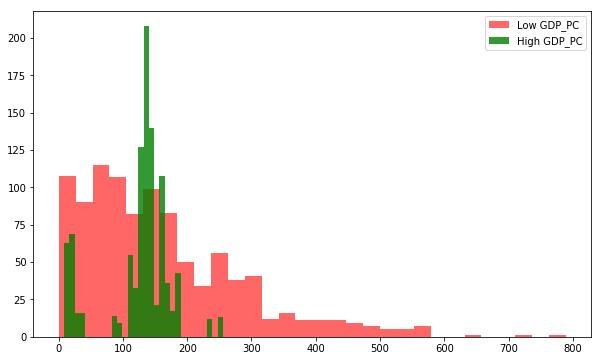

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(low_sample.values, bins=30, histtype='bar', color='red', alpha=0.6, label='Low GDP_PC')
ax.hist(high_sample.values, bins=30, histtype='bar', color='green', alpha=0.8, label='High GDP_PC')
ax.legend()
plt.show();

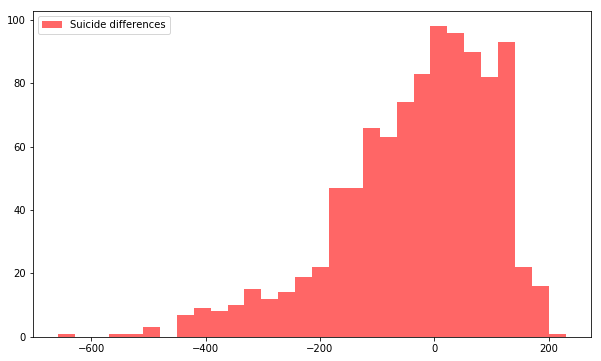

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist((high_sample.values - low_sample.values), bins=30, histtype='bar', color='red', 
        alpha=0.6, label='Suicide differences')
ax.legend()
plt.show();

In [62]:
#Let's find the z-statistic and p-value for the one-sided hypothesis test
stat = ztest(high_sample.values, low_sample.values, high_sample.values.mean()-low_sample.values.mean(),
             'larger')

In [63]:
print("Z-statistic = %.2f" % stat[0])
print("P-value = ", stat[1])

Z-statistic = 0.00
P-value =  0.5


We see that our p-value is 0.5 and so greater than the significance level alpha = 0.05. So, we cannot reject the null hypothesis in favour of the alternate hypothesis. This means that we do not reject the notion that there is no difference between the low gdp group and high gdp group. There is no significant evidence to suggest that the suicide rates in the high gdp group is greater than the suicide rates in the low gdp group. In other words, they could be the same.

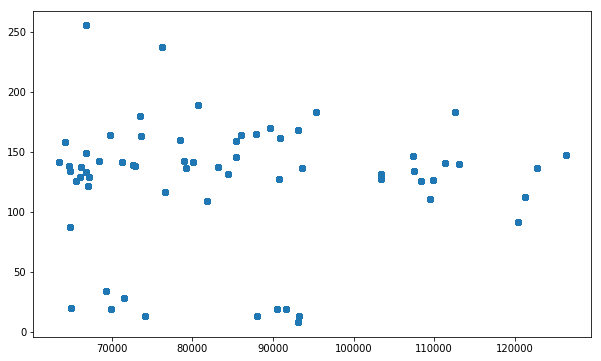

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(high_sample,'o')
plt.show();

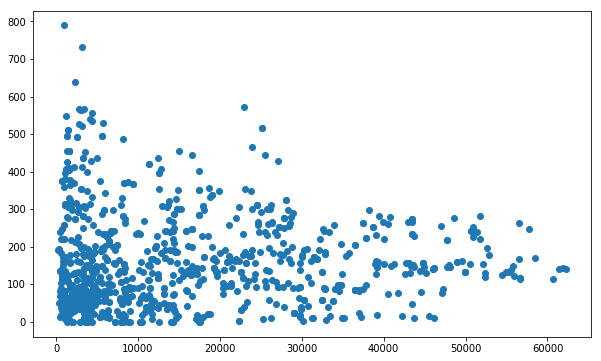

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(low_sample,'o')
plt.show();